In [1]:
import sys
sys.path.insert(0, '..')

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from os import listdir
from os.path import join
from train_cvppp import evaluate

import deepcoloring as dc

%matplotlib inline
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In order to run this example you need to download dataset https://www.plant-phenotyping.org/datasets-download

In [2]:
!wget https://www.dropbox.com/s/whwzh9pdbk69o7x/cvppp_model.t7 -O model.t7

--2019-03-29 10:32:40--  https://www.dropbox.com/s/whwzh9pdbk69o7x/cvppp_model.t7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.1, 2620:100:601a:1::a27d:701
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/whwzh9pdbk69o7x/cvppp_model.t7 [following]
--2019-03-29 10:32:40--  https://www.dropbox.com/s/raw/whwzh9pdbk69o7x/cvppp_model.t7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f41a079a5c9fda384f2a5be6b.dl.dropboxusercontent.com/cd/0/inline/AeBsdFEPNFmljttAGnyDyvs4dlWYbl-FZ14mcHQdHSTYc2BCXeZciUqd66UiQSfDPtnq_yPNtZOPplpVKZ9Xv--mLkg5gneaoF15U0Fk8dY-YA/file# [following]
--2019-03-29 10:32:40--  https://uc6f41a079a5c9fda384f2a5be6b.dl.dropboxusercontent.com/cd/0/inline/AeBsdFEPNFmljttAGnyDyvs4dlWYbl-FZ14mcHQdHSTYc2BCXeZciUqd66UiQSfDPtnq_yPNtZOPplpVKZ9Xv--mLkg5gneaoF15U0Fk8dY-YA/file
Resolving uc6

In [3]:
net = dc.EUnet(3, 9, 4, 3, 1, depth=3, padding=1, init_xavier=True, use_bn=False, use_dropout=True).to(device)
net.load_state_dict(torch.load("model.t7", map_location='cpu'))
net.eval()
print("Model loaded")

Model loaded


(265, 250, 4)
(3, 248, 248)
0 0
0 0
0 0


../deepcoloring/utils.py:250: RuntimeWarning: invalid value encountered in true_divide
  return numpy.exp(x) / numpy.sum(numpy.exp(x), axis=0)


(<Figure size 1440x720 with 2 Axes>, <Figure size 1440x720 with 9 Axes>)

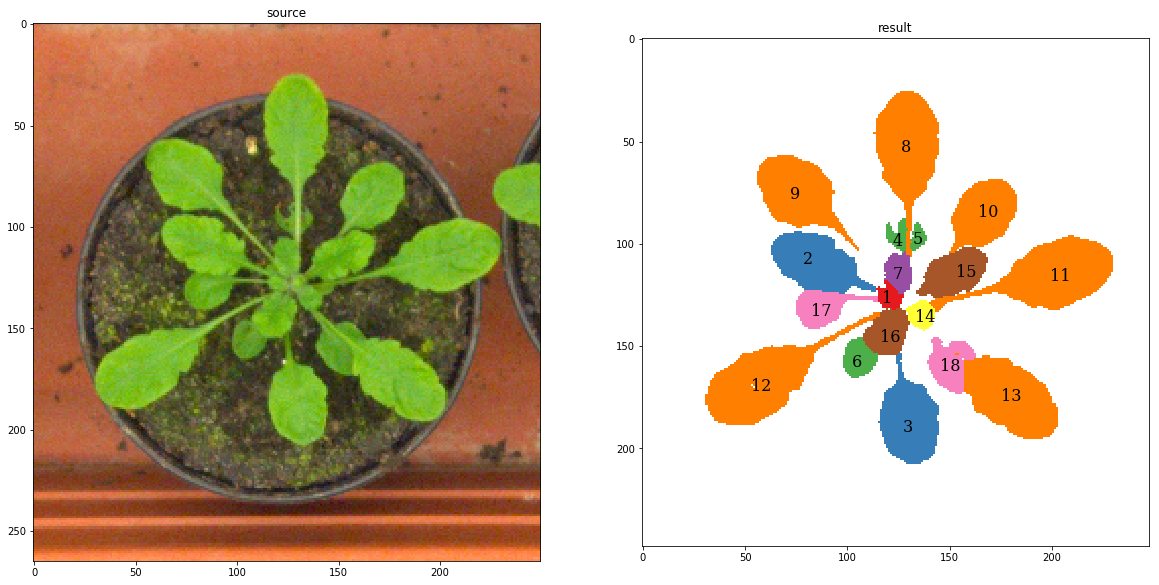

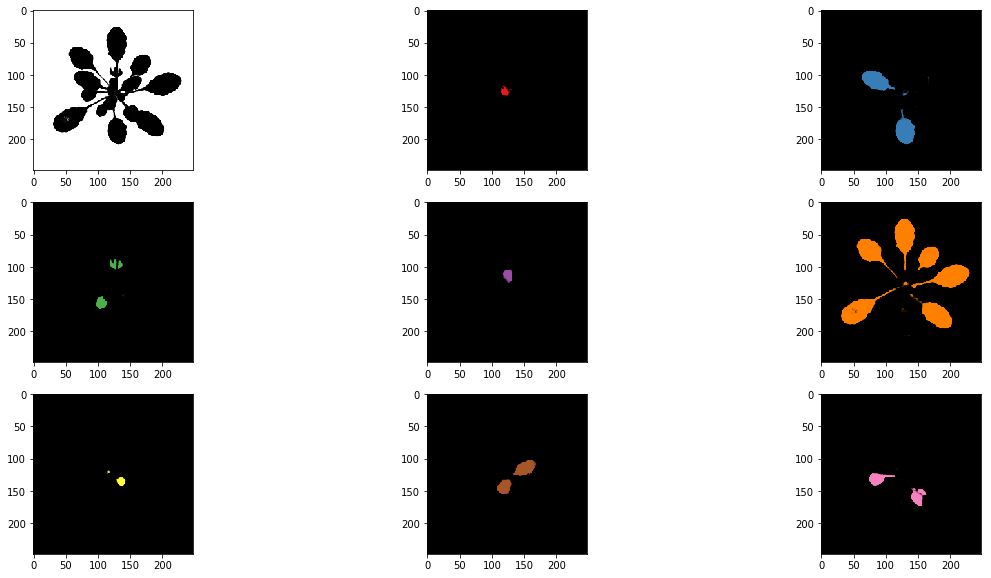

In [4]:
from skimage.io import imread
import os
img_path = '/Users/lisulimowicz/Downloads/Plant_Phenotyping_Datasets/Plant_Phenotyping_Datasets/Plant/Ara2013-RPi'
img_path ='/Users/lisulimowicz/Desktop/DeepColoring-master/images/'
xo = imread(os.path.join(img_path, 'plant050_rgb.png'))[::2,::2]
print(xo.shape)

x = dc.rgba2rgb()(xo, True)/255.
x = dc.normalize(0.5, 0.5, )(x, True)
x = x.transpose(2, 0, 1)[:, :248, :248]

print(x.shape)

vx = torch.from_numpy(np.expand_dims(x, 0)).to(device)
p = net(vx)
p_numpy = p.detach().cpu().numpy()[0]
dc.visualize(xo[:,:,:3],p_numpy,65)